In [19]:
import pandas as pd

# 加载数据
file_path = 'data\\raw\\life_expectancy_data.csv'
data = pd.read_csv(file_path)

# 查看数据基本信息
data.info()

# 查看数据统计描述
data.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2732 non-null   object 
 1   Year                             2732 non-null   int64  
 2   Status                           2732 non-null   object 
 3   Life expectancy                  2724 non-null   float64
 4   Adult Mortality                  2724 non-null   float64
 5   infant deaths                    2732 non-null   int64  
 6   Alcohol                          2547 non-null   float64
 7   percentage expenditure           2732 non-null   float64
 8   Hepatitis B                      2207 non-null   float64
 9   Measles                          2732 non-null   int64  
 10   BMI                             2699 non-null   float64
 11  under-five deaths                2732 non-null   int64  
 12  Polio               

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2732.000000,2724.000000,2724.000000,2732.000000,2547.000000,2732.000000,2207.000000,2732.000000,2699.000000,2732.000000,2714.000000,2517.000000,2714.000000,2732.000000,2317.000000,2.128000e+03,2699.000000,2699.000000,2577.000000,2581.000000
mean,2007.501098,69.120228,165.923642,30.588946,4.555748,727.049563,80.860897,2430.580527,38.069767,42.385066,82.409359,5.946007,82.273397,1.722328,7316.813082,1.245470e+07,4.903927,4.935495,0.624236,11.951724
std,4.626314,9.511317,123.837567,118.158278,4.034548,1974.303746,25.130776,11240.642911,20.062308,160.480411,23.421806,2.506294,23.628897,4.962085,14020.856082,5.761456e+07,4.448684,4.540056,0.211894,3.376084
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.000000,63.000000,75.000000,0.000000,0.850000,4.595646,77.000000,0.000000,19.100000,0.000000,77.000000,4.280000,78.000000,0.100000,464.184650,1.917392e+05,1.600000,1.600000,0.489000,10.100000
50%,2007.000000,72.000000,145.000000,3.000000,3.650000,64.395284,92.000000,17.000000,42.900000,4.000000,93.000000,5.730000,93.000000,0.100000,1741.142552,1.383743e+06,3.400000,3.400000,0.675000,12.300000
75%,2012.000000,75.600000,228.250000,23.000000,7.600000,437.086674,97.000000,370.500000,56.100000,30.000000,97.000000,7.500000,97.000000,0.800000,5828.745662,7.475598e+06,7.200000,7.300000,0.776000,14.200000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [20]:
# 检查缺失值
missing_values = data.isnull().sum()
print(missing_values)


Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            185
percentage expenditure               0
Hepatitis B                        525
Measles                              0
 BMI                                33
under-five deaths                    0
Polio                               18
Total expenditure                  215
Diphtheria                          18
 HIV/AIDS                            0
GDP                                415
Population                         604
 thinness  1-19 years               33
 thinness 5-9 years                 33
Income composition of resources    155
Schooling                          151
dtype: int64


In [21]:
# 使用线性插值法填充缺失值
data.interpolate(method='linear', inplace=True)

# 检查填充后的数据是否还有缺失值
missing_values_after = data.isnull().sum()
print(missing_values_after)

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


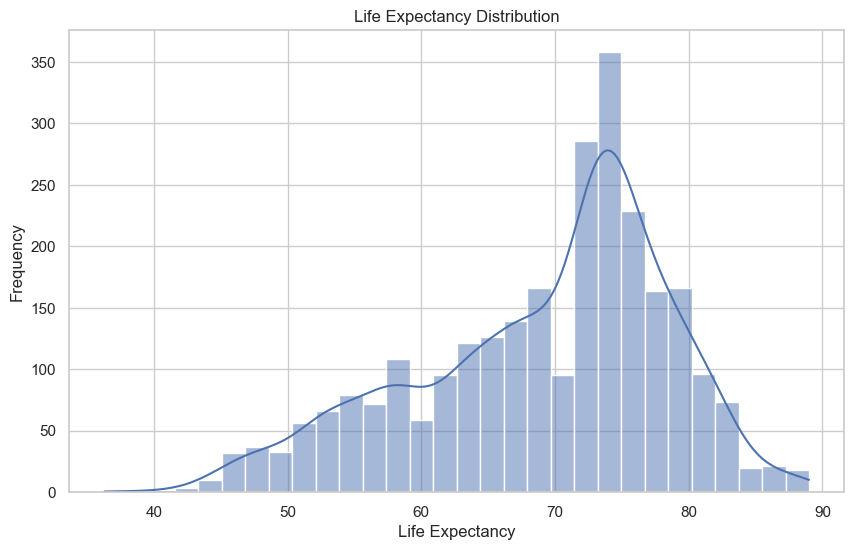

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# 设置图形的基本风格
sns.set(style="whitegrid")

# 直方图：预期寿命分布
plt.figure(figsize=(10, 6))
sns.histplot(data['Life expectancy '], bins=30, kde=True)
plt.title('Life Expectancy Distribution')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


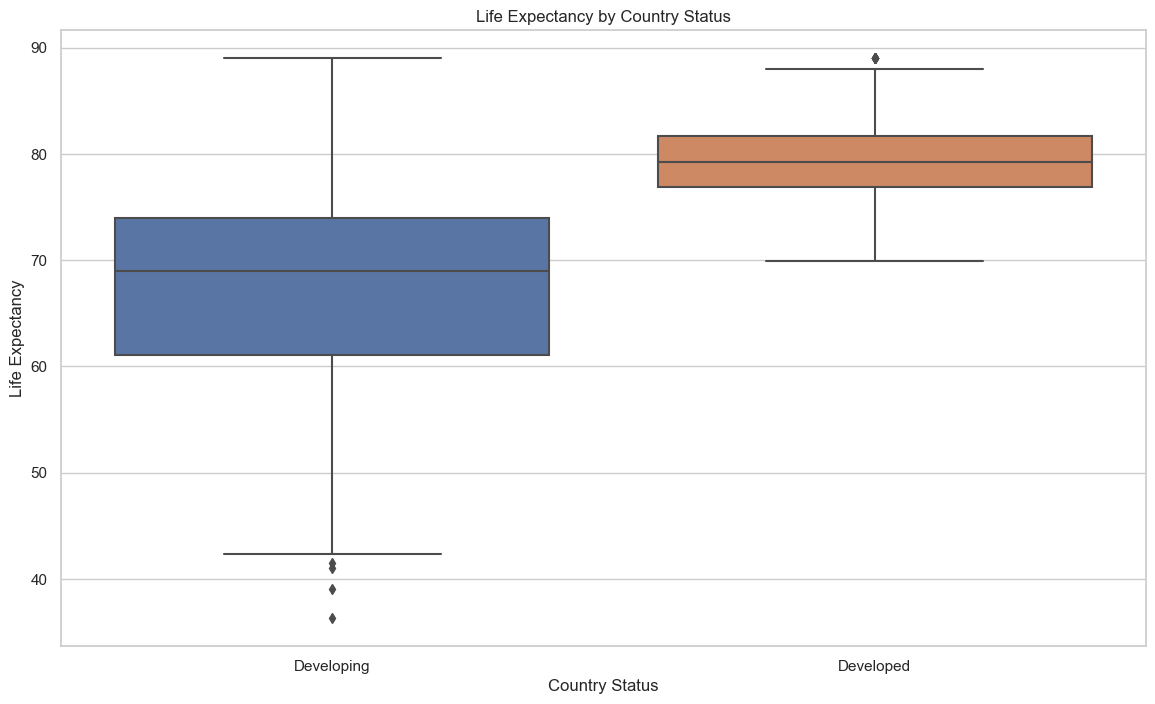

In [23]:
# 箱线图：Country指标对预期寿命的影响
plt.figure(figsize=(14, 8))
sns.boxplot(x='Status', y='Life expectancy ', data=data)
plt.title('Life Expectancy by Country Status')
plt.xlabel('Country Status')
plt.ylabel('Life Expectancy')
plt.show()


In [27]:
# 将类别变量'Country'和'Status'转换为数值类型
data['Country'] = data['Country'].astype('category').cat.codes
data['Status'] = data['Status'].astype('category').cat.codes

D:\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


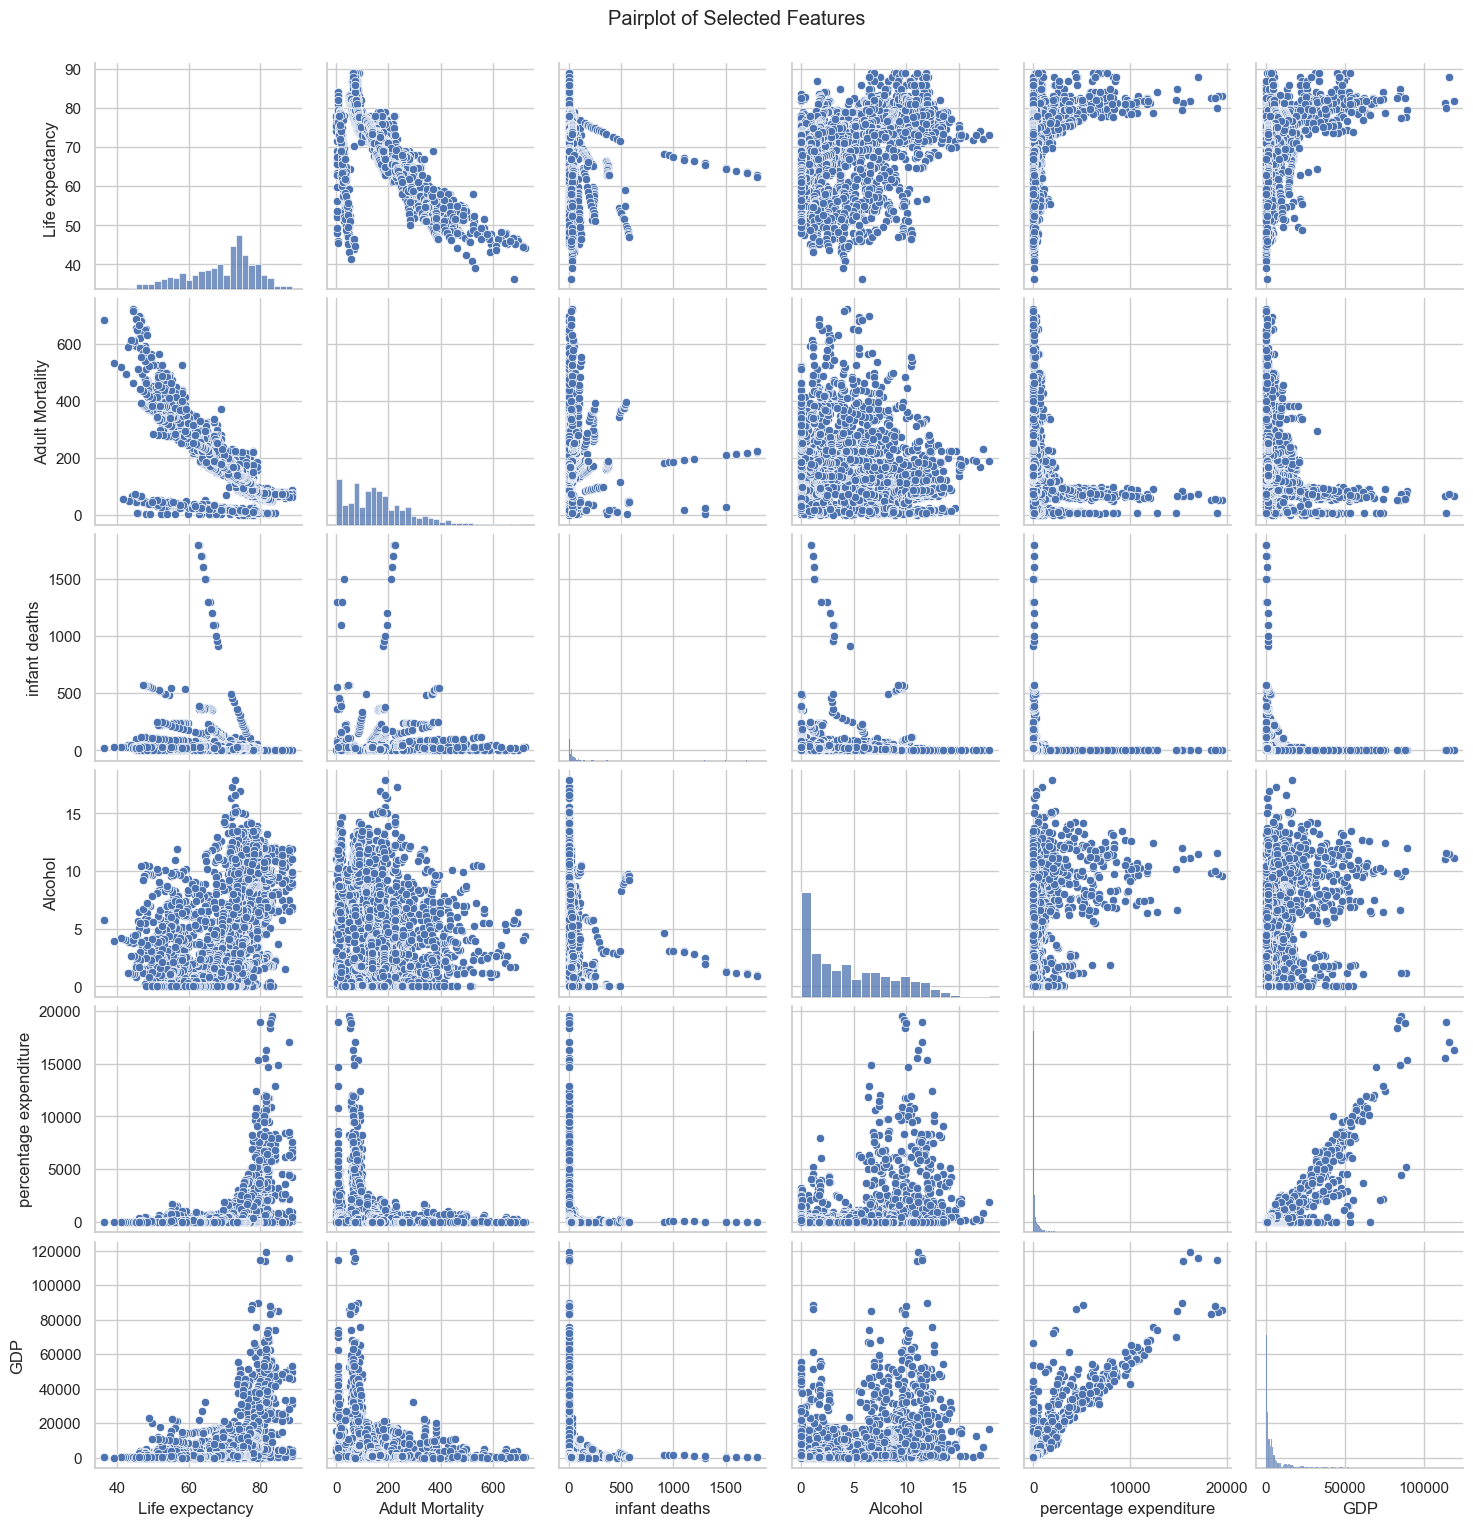

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 选择感兴趣的特征
features = ['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',  'GDP']

# 确保数据没有缺失值
data = data[features].dropna()

# 绘制散点图矩阵和直方图
sns.pairplot(data, diag_kind='hist', height=2.5)
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


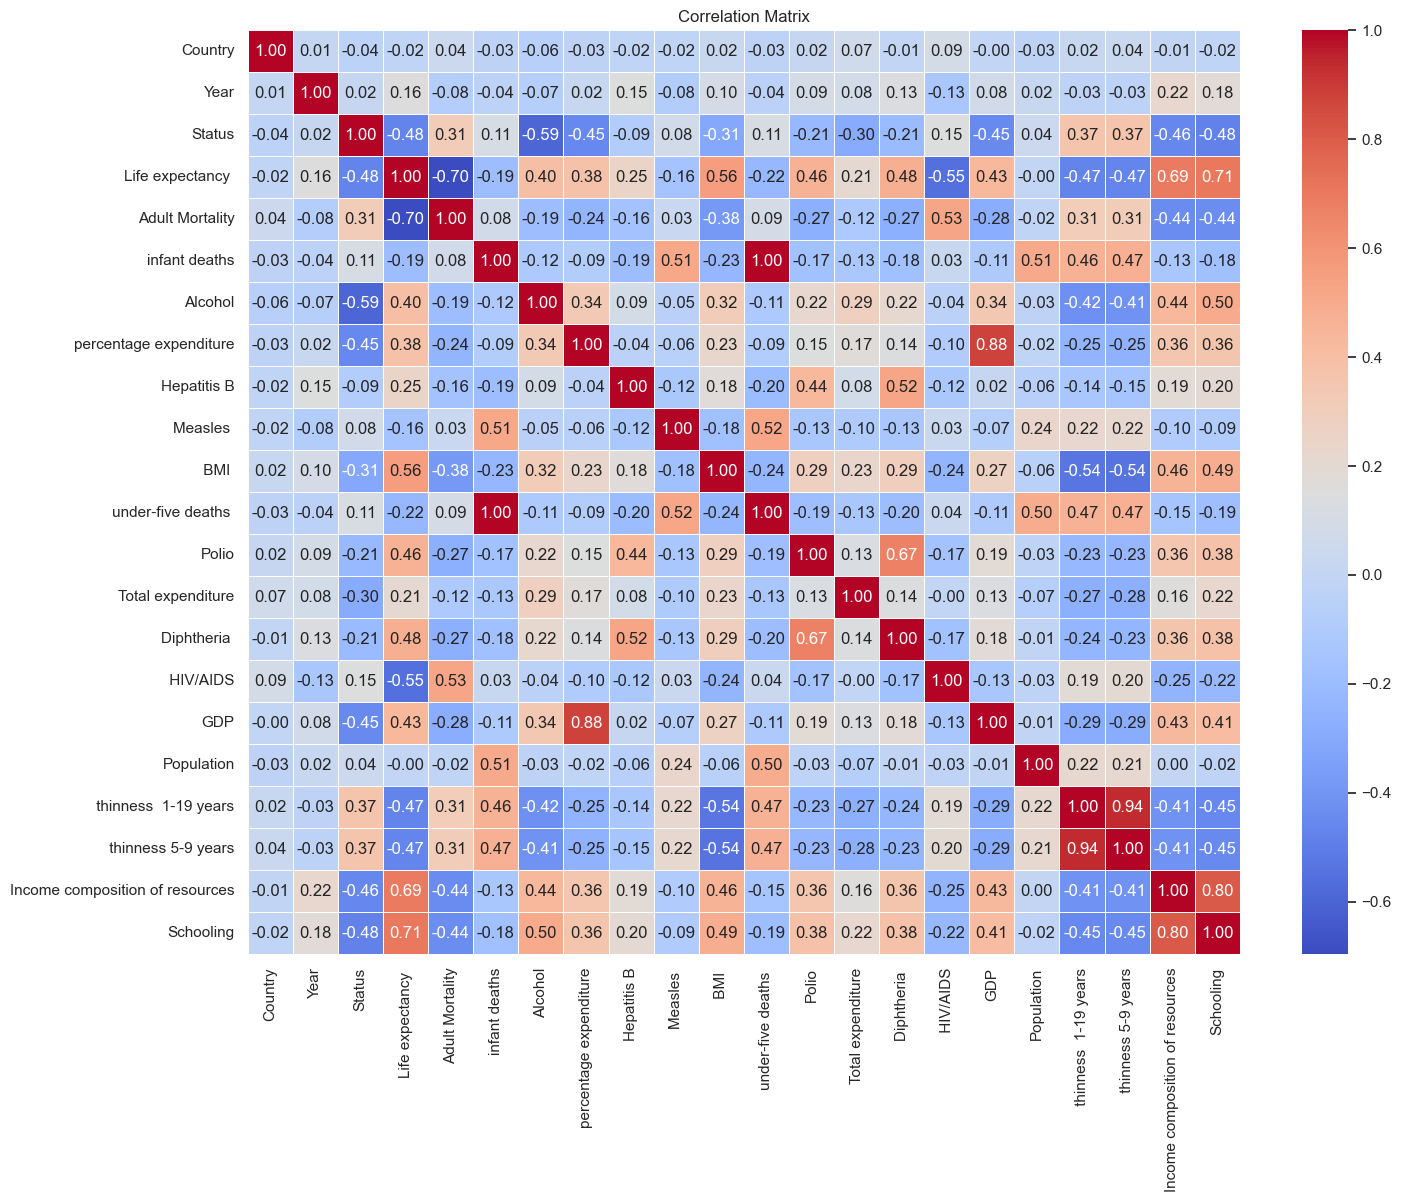

In [9]:
# 热力图：各变量之间的相关性
plt.figure(figsize=(16, 12))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [11]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 准备数据
features = data.drop(['Life expectancy '], axis=1)
target = data['Life expectancy ']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# 构建随机森林回归模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 获取特征重要性
feature_importances = rf_model.feature_importances_
features_list = features.columns

# 创建特征重要性DataFrame
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 输出特征重要性
print(importance_df)

                            Feature  Importance
14                         HIV/AIDS    0.601841
19  Income composition of resources    0.163285
3                   Adult Mortality    0.116278
18               thinness 5-9 years    0.022315
10               under-five deaths     0.016192
20                        Schooling    0.011403
9                              BMI     0.011342
1                              Year    0.008476
5                           Alcohol    0.006770
12                Total expenditure    0.005799
4                     infant deaths    0.005235
0                           Country    0.004559
11                            Polio    0.004459
17             thinness  1-19 years    0.004329
16                       Population    0.003527
6            percentage expenditure    0.003386
13                      Diphtheria     0.003206
15                              GDP    0.002900
8                          Measles     0.002507
7                       Hepatitis B    0

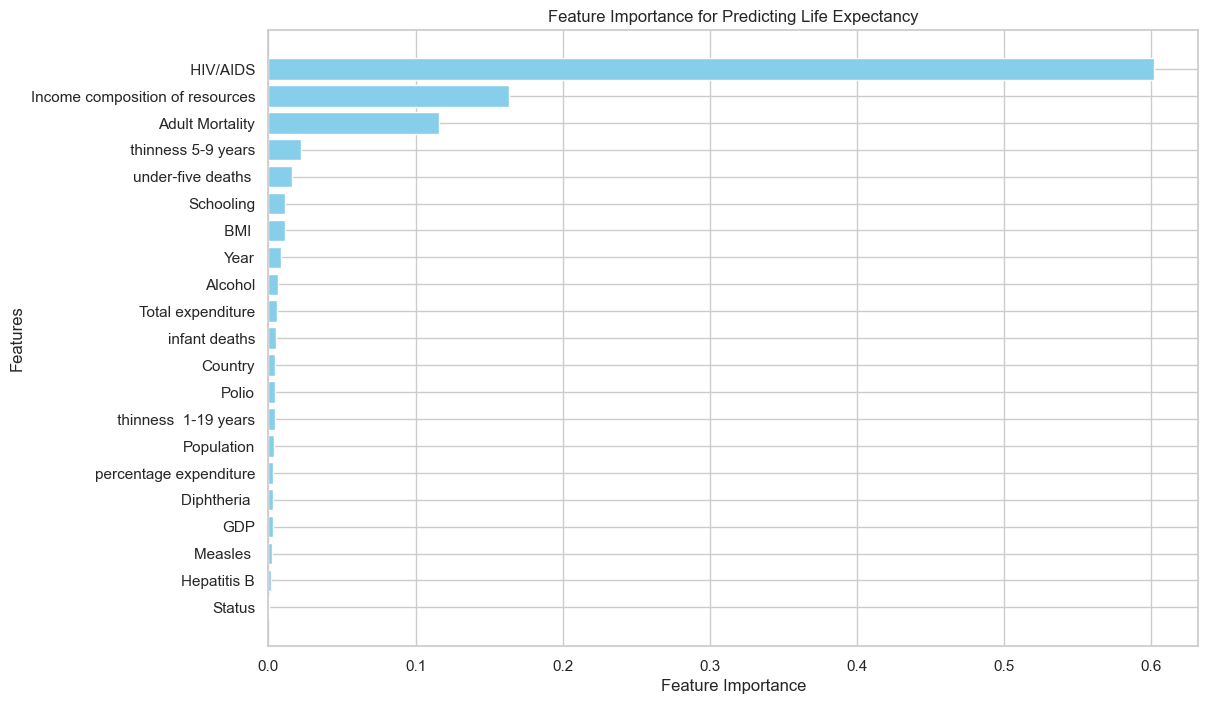

In [12]:
# 创建特征重要性DataFrame
importance_df = pd.DataFrame({'Feature': features_list, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 可视化特征重要性
plt.figure(figsize=(12, 8))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for Predicting Life Expectancy')
plt.gca().invert_yaxis()  # 反转y轴，使得重要性高的特征在顶部
plt.show()

In [14]:
#选择重要性前10的特征
top_10_features = importance_df['Feature'].head(10).tolist()
X_top_10 = data[top_10_features]